<img src="./imgs/ml.jpg" alt="Drawing" style="width: 600px;"/>

Credit: https://www.meme-arsenal.com/en/create/meme/1868835

# AUTOENCODER + CLASSIFIER, a breif example for Pytorch.

Author: 
Wei Ye, Shaowei Wu

This is my first pytorch coding post. It is based on my group mate Wei Ye's code in CSCI 8581.

In this notebook , I will show how to combine an [autoencoder][1] and a few classifiers to construct a multi-task model in pytorch **step by step**. The dataset comes from CSCI 8581. 

There are  some reference for further reading. Anyway, I will try to explain the details in 'one' page.

[1]:https://en.wikipedia.org/wiki/Autoencoder

In [4]:
import pandas as pd
import numpy as np
# import data using pandas
data=pd.read_csv('./data/dataset.csv')

In [6]:
# display the dataset
data

,Unnamed: 0,index,ingested,ztf_id,zvm_id,AGN,BL Her,Beta Lyr,Cepheid,Cepheid type-II,...,roms,significance,skew,smallkurt,stetson_j,stetson_k,sw,welch_i,wmean,wstd
0,102066,102066,1.0,1.071930e+13,ZTFbkgj8gih,0.0,0.0,0.0,0.0,0.0,...,0.834601,10.323892,0.446629,8.569163,75.072039,0.730721,0.442902,126.778630,17.280580,0.026293
1,62756,62756,1.0,1.048741e+13,ZTF1ujcg1f7,0.0,0.0,0.0,0.0,0.0,...,1.103918,13.238870,-0.125668,4.635338,3.555367,0.822637,0.972141,12.673600,20.784238,0.213611
2,124834,124834,1.0,1.085322e+13,ZTFhzmdxr9g,0.0,0.0,0.0,0.0,0.0,...,1.628610,42.274978,5.902958,57.228428,-13.140847,0.760559,0.958370,-9.869388,20.086235,0.216376
3,90928,90928,1.0,1.029763e+13,ZTFce4njbny,0.0,0.0,0.0,0.0,0.0,...,3.236169,125.629450,-3.545247,400.901273,-20.403730,0.869648,0.953871,-30.344550,18.132819,0.133568
4,81757,81757,1.0,1.053811e+13,ZTFe3frd9i1,0.0,0.0,0.0,0.0,0.0,...,2.147679,48.261472,9.276425,114.822709,11.968448,0.828596,0.960417,24.957636,15.564013,0.038485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,74220,74220,1.0,1.083360e+13,ZTF1cl3m3r2,0.0,0.0,0.0,0.0,0.0,...,4.779705,446.147022,145.024383,2348.694825,-74.190796,0.852355,0.890039,-359.797128,17.902267,0.151464
69996,19084,19084,1.0,1.064659e+13,ZTF8am400ku,0.0,0.0,0.0,0.0,0.0,...,10.116485,350.176987,850.973460,36210.035792,49.310596,0.887842,0.715181,156.768820,16.120440,0.144459
69997,46782,46782,1.0,1.068337e+13,ZTF328c072c,0.0,0.0,0.0,0.0,0.0,...,2.742242,48.505500,-9.957315,239.277269,-41.692685,0.867872,0.917511,-117.915088,17.547884,0.074043
69998,65224,65224,1.0,1.068345e+13,ZTFvij8xkm0,0.0,0.0,0.0,0.0,0.0,...,2.677773,55.382964,-4.305035,184.067394,3.395322,0.869434,0.945792,-10.068047,18.232474,0.121420


### Define lists that contain the name of features and labels.

In [8]:
# NAME of feature columns
FEATS_COL = ['period', 'significance', 'n', 'median', 'wmean', 'wstd', 'chi2red', 'roms', 'norm_peak_to_peak_amp',
             'norm_excess_var', 'median_abs_dev', 'iqr', 'f60', 'f70', 'f80' , 'f90', 'skew', 'smallkurt', 
             'inv_vonneumannratio', 'welch_i', 'stetson_j', 'stetson_k', 'ad', 'sw', 'f1_power', 'f1_bic','f1_amp', 
             'f1_phi0', 'f1_relamp1', 'f1_relphi1', 'f1_relamp2', 'f1_relphi2', 'f1_relamp3', 'f1_relphi3', 'f1_relamp4', 
             'f1_relphi5', 'n_ztf_alerts', 'mean_ztf_alert_braai',  
             'AllWISE__w1mpro', 'AllWISE__w1sigmpro', 'AllWISE__w2mpro', 'AllWISE__w2sigmpro', 'AllWISE__w3mpro',
             'AllWISE__w3sigmpro', 'AllWISE__w4mpro','AllWISE__w4sigmpro', 'AllWISE__ph_qual',
             'Gaia_DR2__phot_g_mean_mag', 'Gaia_DR2__phot_bp_mean_mag', 'Gaia_DR2__phot_rp_mean_mag', 'Gaia_DR2__parallax',
             'Gaia_DR2__parallax_error', 'Gaia_DR2__pmra', 'Gaia_DR2__pmra_error', 'Gaia_DR2__pmdec', 'Gaia_DR2__pmdec_error',
             'Gaia_DR2__astrometric_excess_noise', 'Gaia_DR2__phot_bp_rp_excess_factor',
             'PS1_DR1__gMeanPSFMag', 'PS1_DR1__gMeanPSFMagErr', 'PS1_DR1__rMeanPSFMag', 'PS1_DR1__rMeanPSFMagErr', 
             'PS1_DR1__iMeanPSFMag', 'PS1_DR1__iMeanPSFMagErr', 'PS1_DR1__zMeanPSFMag', 'PS1_DR1__zMeanPSFMagErr', 
             'PS1_DR1__yMeanPSFMag', 'PS1_DR1__yMeanPSFMagErr', 'PS1_DR1__qualityFlag']

# NAME of label columns
LABELS_COL = ['variable', 'periodic', 'long timescale', 'irregular', 'eclipsing', 'EA', 'EB', 'EW', 'flaring', 'bogus',
              'pulsator', 'Delta Scu', 'Cepheid', 'RR Lyrae', 'LPV', 'Mira', 'SRV', 'binary star', 'W Uma', 'Beta Lyr',
              'RS CVn', 'AGN', 'YSO']

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# there is one column of string dtype, we need to convert it to int-dtype one.
label_encoder = LabelEncoder()
data['AllWISE__ph_qual']=label_encoder.fit_transform(data['AllWISE__ph_qual'])

In [10]:
raw_feat_data=data[FEATS_COL]
raw_feat_data

,period,significance,n,median,wmean,wstd,chi2red,roms,norm_peak_to_peak_amp,norm_excess_var,...,PS1_DR1__gMeanPSFMagErr,PS1_DR1__rMeanPSFMag,PS1_DR1__rMeanPSFMagErr,PS1_DR1__iMeanPSFMag,PS1_DR1__iMeanPSFMagErr,PS1_DR1__zMeanPSFMag,PS1_DR1__zMeanPSFMagErr,PS1_DR1__yMeanPSFMag,PS1_DR1__yMeanPSFMagErr,PS1_DR1__qualityFlag
0,638.203392,10.323892,263.0,17.2810,17.280580,0.026293,1.302158,0.834601,0.005928,5.959733e-07,...,0.008173,16.746901,0.002109,16.545099,0.002660,16.490801,0.003791,16.441299,0.009441,60.0
1,0.024785,13.238870,64.0,20.7980,20.784238,0.213611,1.750986,1.103918,0.013147,4.627087e-05,...,0.000000,20.716000,0.070433,19.948601,0.027574,19.569901,0.025853,19.288401,0.018201,52.0
2,0.143803,42.274978,52.0,20.0900,20.086235,0.216376,4.482082,1.628610,0.019138,1.371048e-04,...,0.216329,20.288799,0.021331,19.140900,0.027460,18.440201,0.021492,17.916401,0.016800,60.0
3,0.413181,125.629450,68.0,18.1750,18.132819,0.133568,13.397498,3.236169,0.012696,5.158521e-05,...,0.026070,18.137800,0.025632,18.086201,0.008809,18.142000,0.014741,18.162600,0.029057,52.0
4,0.408992,48.261472,80.0,15.5615,15.564013,0.038485,6.665935,2.147679,0.004172,5.185334e-06,...,0.010956,15.573000,0.002684,15.526600,0.011109,15.457800,0.010758,15.440800,0.003390,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.147927,446.147022,142.0,17.8795,17.902267,0.151464,32.885707,4.779705,0.016361,8.421307e-05,...,0.036146,17.875099,0.015237,17.474800,0.005624,17.372900,0.021434,17.202000,0.005745,60.0
69996,0.142266,350.176987,68.0,16.0745,16.120440,0.144459,139.722523,10.116485,0.013583,8.378785e-05,...,0.052543,16.104900,0.027450,15.940100,0.016539,15.735300,0.008238,15.792400,0.037322,60.0
69997,0.057444,48.505500,55.0,17.5680,17.547884,0.074043,10.050414,2.742242,0.007125,1.586307e-05,...,0.020108,17.561300,0.019155,17.592699,0.008392,17.648199,0.010982,17.542500,0.020736,60.0
69998,0.051981,55.382964,55.0,18.2570,18.232474,0.121420,9.432388,2.677773,0.010803,4.006329e-05,...,0.029872,18.257601,0.022021,18.247400,0.021117,18.378099,0.008947,18.277901,0.022746,52.0


In [11]:
raw_label_data=data[LABELS_COL]
raw_label_data

,variable,periodic,long timescale,irregular,eclipsing,EA,EB,EW,flaring,bogus,...,RR Lyrae,LPV,Mira,SRV,binary star,W Uma,Beta Lyr,RS CVn,AGN,YSO
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
69996,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
69997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Before we move on, let's do a scaling for the **feature** data. There are a few methods to choose. The [StandardScaler][2] is adopted since it looks more "natural". In the real world, many physical quantities are normally distributed.

The StandardScaler will do a linear transformation: $$x'=\frac{x-\mu}{\sigma}$$ where $\mu$ and $\sigma$ are the mean and std of the original data.

[2]:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [13]:
# now rescale the feature columns
from sklearn.preprocessing import StandardScaler

feat_data = raw_feat_data.values
df_feats_values_scaled = StandardScaler().fit_transform(feat_data)
df_feats_scaled = pd.DataFrame(df_feats_values_scaled, columns=raw_feat_data.columns)
df_feats_scaled # this is the data frame we need

,period,significance,n,median,wmean,wstd,chi2red,roms,norm_peak_to_peak_amp,norm_excess_var,...,PS1_DR1__gMeanPSFMagErr,PS1_DR1__rMeanPSFMag,PS1_DR1__rMeanPSFMagErr,PS1_DR1__iMeanPSFMag,PS1_DR1__iMeanPSFMagErr,PS1_DR1__zMeanPSFMag,PS1_DR1__zMeanPSFMagErr,PS1_DR1__yMeanPSFMag,PS1_DR1__yMeanPSFMagErr,PS1_DR1__qualityFlag
0,1.795541,-0.411116,1.056842,-0.080996,-0.070772,-0.729371,-0.204919,-0.618402,-0.556206,-0.090013,...,-0.505132,-0.171156,-0.711477,-0.108664,-0.679382,-0.035408,-0.589965,0.087552,-0.428986,0.202861
1,-0.169144,-0.404608,-0.609176,1.717669,1.745705,0.605940,-0.203427,-0.567115,-0.058580,-0.067296,...,-0.771984,1.529579,2.328723,1.432994,0.796992,1.331472,0.413797,1.111349,-0.121882,-0.577069
2,-0.168778,-0.339781,-0.709640,1.355583,1.383824,0.625651,-0.194344,-0.467194,0.354400,-0.022121,...,6.291251,1.346526,0.143841,1.067136,0.790237,0.829973,0.215383,0.617988,-0.170997,0.202861
3,-0.167949,-0.153682,-0.575688,0.376213,0.371072,0.035347,-0.164693,-0.161056,-0.089659,-0.064653,...,0.079213,0.424836,0.335221,0.589397,-0.315000,0.697595,-0.091769,0.706519,0.258703,-0.577069
4,-0.167962,-0.326416,-0.475225,-0.960383,-0.960730,-0.642459,-0.187080,-0.368344,-0.677252,-0.087730,...,-0.414266,-0.674166,-0.685891,-0.570005,-0.178704,-0.493979,-0.272985,-0.272220,-0.641119,0.202861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.168765,0.561914,0.043836,0.225089,0.251542,0.162925,-0.099879,0.132890,0.162960,-0.048426,...,0.408199,0.312270,-0.127323,0.312456,-0.503739,0.356175,0.212744,0.361095,-0.558559,0.202861
69996,-0.168783,0.347649,-0.575688,-0.698025,-0.672249,0.112984,0.255438,1.149209,-0.028490,-0.048638,...,0.943568,-0.446250,0.416117,-0.382705,0.143071,-0.370791,-0.387639,-0.145787,0.548454,0.202861
69997,-0.169044,-0.325871,-0.684524,0.065781,0.067812,-0.388981,-0.175824,-0.255117,-0.473654,-0.082420,...,-0.115449,0.177809,0.047016,0.365860,-0.339711,0.478386,-0.262794,0.483536,-0.033011,0.202861
69998,-0.169061,-0.310516,-0.684524,0.418150,0.422739,-0.051247,-0.177880,-0.267395,-0.220118,-0.070384,...,0.203350,0.476170,0.174543,0.662414,0.414358,0.802405,-0.355381,0.747981,0.037455,-0.577069


**For label data, we use [LabelEncoder][3] to convert the data type into integer.**

[3]:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [15]:
df_labels = raw_label_data.apply(LabelEncoder().fit_transform)
df_labels # this is the data frame we need

,variable,periodic,long timescale,irregular,eclipsing,EA,EB,EW,flaring,bogus,...,RR Lyrae,LPV,Mira,SRV,binary star,W Uma,Beta Lyr,RS CVn,AGN,YSO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,47,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,4,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
4,47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,47,4,0,0,4,0,0,5,0,0,...,0,0,0,0,4,3,0,0,0,0
69996,47,4,0,0,4,0,0,5,0,0,...,0,0,0,0,4,3,0,0,0,0
69997,47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,47,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Now use train_test_split to split the data into 2 parts for X and y. If you would like to have validation set, just apply train_test_split twice.**

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_feats_scaled.values, df_labels.values, test_size=0.5, random_state=8581)

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset

We will use CUDA to accelerate the training. For more up-to-date information, visit https://pytorch.org/docs/stable/notes/cuda.html.

A command like 
```pip3 install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html```
as shown in the official Pytorch website would automatically install Pytorch along with CUDA and cuDNN. Note that the command will install all the dependencies for Pytorch on CUDA and Pytorch will not use system installations of CUDA and cuDNN. Say it only puts everything needed in the pip/conda environment. However, I do not think NVIDIA drivers will be installed. Visit the link below for explanation.
https://discuss.pytorch.org/t/install-pytorch-gpu-with-pre-installed-cuda-and-cudnn/70808/2

In [19]:
# I have one beautiful GTX1660 Ti installed.
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1660 Ti'

Now let's build a simple FCNN classifier. We have to be careful about the dimensions of input and output. The classifier will receive a $N \times 16$ tensor from Autoencoder, which will be defined later. The output of classifier is a $N \times C$ tensor, where C is the number of classes for a single label and N is the number of records([minibatch][4]). For example, if there are 4 classes (BTC, LTC, DOGE,ETH) for label "Crypto", then C will be 4 and the classifer will be used to determine which kind of Crypto each record belongs to. One may ask why we do not save the output in one column, say the output is of dimension $N \times 1$. The reason is that we use [CROSSENTROPYLOSS][4] as our loss function and it will preprocess the Input with LogSoftMax. Otherwise we may want to process the output of classifier with SoftMax, etc. 

[4]:https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [20]:
# this is a simple classifier for single label
class classifier(nn.Module):
    def __init__(self, label_name_):
        super().__init__()
        self.fc1 = nn.Linear(in_features=16, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=16)
        self.outputfc = nn.Linear(in_features=16, out_features=df_labels[label_name_].nunique())
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.outputfc(x)
        return x


There are 69 feature columns in our dataset. So, the input of our **autoencoder** should be $N \times 69$. 

The autoencoder will output a list of $N \times 16$ tensors for classifier and a $N \times 69$ tensor(dec_data) for reconstruction error. It contains two parts. The first part will compress the information, in a way pretty similar to PCA. The second part will reconstruct the information.

<img src="./imgs/Autoencoder_schema.png" alt="Drawing" style="width: 500px;"/>


In [23]:
class MLP_0(nn.Module):
    def __init__(self, model_list:list):
        super().__init__()
        # ==============AUTOENCODER================
        # encoder
        self.enc1 = nn.Linear(in_features=69, out_features=64)
        self.enc2 = nn.Linear(in_features=64, out_features=32)
        self.enc_out = nn.Linear(in_features=32, out_features=16) # output encoded tensor
        # decoder
        self.dec1 = nn.Linear(in_features=16, out_features=32)
        self.dec2 = nn.Linear(in_features=32, out_features=64)
        self.dec_out = nn.Linear(in_features=64, out_features=69) # output decoded data
        # ==========================================
        
        self.classifiermodels=[]
        for i in range(len(model_list)):
            self.classifiermodels.append(model_list[i])
        
        
    def forward(self, x):
        
        enc_data = F.relu(self.enc1(x))
        enc_data = F.relu(self.enc2(enc_data))
        enc_data = self.enc_out(enc_data)
        
        dec_data = F.relu(self.dec1(enc_data))
        dec_data = F.relu(self.dec2(dec_data))
        dec_data = self.dec_out(dec_data)
        
        outlist=[]
        for i in range(len(model_list)):
            outlist.append(self.classifiermodels[i].forward(enc_data))
        
        return dec_data, outlist

**A model_list should be pass to MLP_0.**

In [27]:
# Model, Optimizer, Loss
model_list=[classifier(label_name_).cuda() for label_name_ in LABELS_COL]

In [28]:
# Initialize the model.
model = MLP_0(model_list).cuda()

In [29]:
# number of parameters in model, from https://discuss.pytorch.org/t/how-do-i-check-the-number-of-parameters-of-a-model/4325/25
sum(p.numel() for p in model.parameters())+sum([sum(p.numel() for p in model_.parameters()) for model_ in model_list])

280550

In [32]:
# Hyper-parameters
epochs = 100
learning_rate = 1e-3

# DataLoader 
train_data = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).long())  # Pytorch uses FP32
train_ldr = torch.utils.data.DataLoader(train_data, batch_size=256, shuffle=False)

**Remember that Pytorch will not detect the parameters of the model inside a model (here we have 23 classifier models inside MLP_0). We have to pass a list of all the parameters to be optimized. If we pass list(model.parameters()) only, the optimizer will update the parameters of Autoencoder without parameters of classifiers.**


In [33]:
classifierparaml=[]
for model_element in model.classifiermodels:
    classifierparaml+=(model_element.parameters())

In [34]:
criterion_MSE = nn.MSELoss() # for reconstruction loss
criterion_CE = nn.CrossEntropyLoss() # for classification loss
optimizer = torch.optim.Adam(list(model.parameters())
                             +list(classifierparaml), lr=learning_rate)

In [ ]:
# Training
loss_list = []
alpha=0.2
for model_s in model.classifiermodels:
    model_s.train()

for i in range(epochs):
    for (batch_idx, batch) in enumerate(train_ldr):
        #X_train_batch = batch[0] # for CPU
        X_train_batch = batch[0].cuda() # for CUDA
        #y_train_batch = batch[1] # for CPU
        y_train_batch = batch[1].cuda() # for CUDA

        X_reco, outlist_ = model.forward(X_train_batch) # This will call the forward function, usually it returns tensors.
                
        loss_1 = criterion_MSE(X_reco, X_train_batch) # reconstruction loss
        loss_2 = 0. # classification loss
        for j in range(len(LABELS_COL)):
            if j in range(23):
                loss_2 += criterion_CE(outlist_[j], y_train_batch[:,j]) # classification loss
        loss = loss_1 + loss_2
        
        
        # Zero the gradients before running the backward pass.
        optimizer.zero_grad() 
        
        # Backward pass: compute gradient of the loss with respect to all the learnable
        # parameters of the model. Internally, the parameters of each Module are stored
        # in Tensors with requires_grad=True, so this call will compute gradients for
        # all learnable parameters in the model.
        loss.backward()
        
        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimizer.step()

        loss_list.append(loss)
        if batch_idx % 50 == 0:
            #print("Epoch: {}, batch: {} Loss: {} label_loss:{}".format(i, batch_idx, loss, label_loss_))
            print("Epoch: {}, batch: {} Loss1: {:0.4f} Loss2: {:0.4f} Loss: {:0.4f}".format(i, batch_idx, loss_1, loss_2 ,loss))


In [41]:
# Prediction
preds = []
with torch.no_grad():
    X_reco_final, outlist_final = model.forward(torch.tensor(X_test).float().cuda())
#print("The prediction result: \n", X_reco_final.int())

In [42]:
# Function for evaluation:
# Calculate the accuracy for each class
from sklearn.metrics import accuracy_score

def get_accuracy(y_true, y_pred):
    acc_list=[]

    for i in range(y_true.shape[1]):
        acc_list.append(accuracy_score(y_true[:, i], y_pred[:, i]))

    return np.array(acc_list)

The mean accuracy:  0.9745180124223601


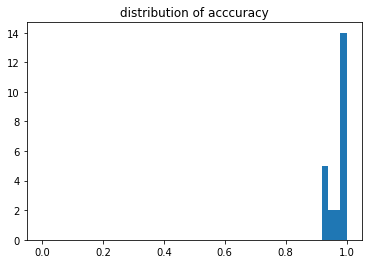

In [45]:
scorelist=[(accuracy_score(F.softmax(outlist_final[iii], dim=1).argmax(dim=1).cpu(), y_test[:, iii])) for iii in range(23)]

# Evaluation
print("The mean accuracy: ", np.mean(scorelist))

import matplotlib.pyplot as plt
plt.hist(scorelist, bins=np.linspace(0., 1, 50))
plt.title("distribution of acccuracy")
plt.show()